In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw
import random
from numpy.linalg import norm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hac

In [30]:
def get_curves():

    files  = []
    venues = []
    x      = []
    curves = []
    
    for NNN in [3, 5, 6, 10]:
        
        city         = 'london'
        outfolder    = '../ProcessedData/' + city + '/timeseries/senior_8_12'
        curvefodler  = outfolder + '/avg_curves/' + str(NNN)   
        #files       += [curvefodler + '/' + fff for fff in os.listdir(curvefodler) if '.dat' in fff]

        for fff in os.listdir(curvefodler):
            if '.dat' in fff: 
                a, b, c, d = fff.replace('.dat', '').split('_')
                files.append(curvefodler + '/' + fff)
        
                venuefile = outfolder + '/clusters_venues/' + str(NNN) + '/' + 'venues_in_' + d + '_' + c + '.dat'
                vens      = [line.strip() for line in open(venuefile)]
                
        
        
    curves = []

    xs = []
    ys = []

    ys_venues = {}
    
    for ind, fn in enumerate(files):

        with open(fn) as myfile:
            x, y = myfile.read().strip().split('\n')
            xs.append(x)
            ys.append(y)
            
            

    x      = [float(xx) for xx in x.split('\t')]
    curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]
    print(len(curves))
  
    return x, curves
   

   
x, curves = get_curves()

332


In [31]:
def get_distance_matrix(curves):

    n = len(curves)
    distances = np.zeros((n,n))

    for i, x in enumerate(curves[0:n]):
        for j, y in enumerate(curves[0:n]):

            if i != j:
                xx = np.asarray(x).reshape(-1, 1)
                yy = np.asarray(y).reshape(-1, 1)

                dist, cost, acc, path = dtw(xx, yy, dist=lambda xx, yy: norm(xx - yy, ord=1))
                map_x, map_y = path


                distances[i,j] = spearmanr(xx[map_x],yy[map_y])[0]

    return distances
                
distances = get_distance_matrix(curves)

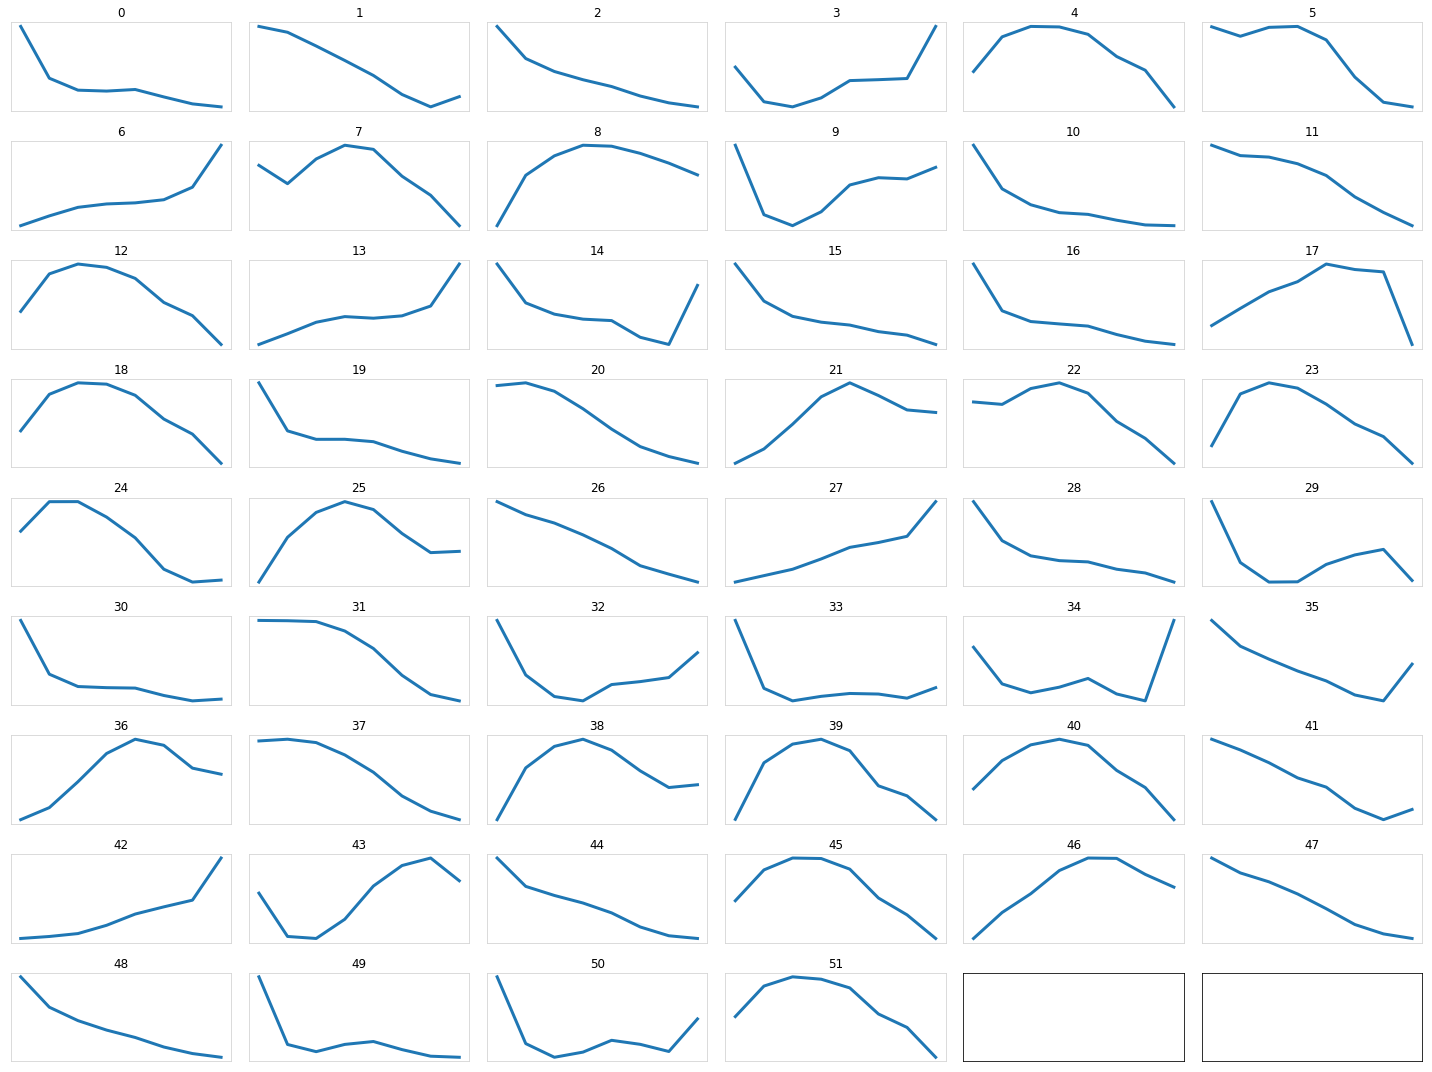

In [8]:
def plot_curves(curves):
    
    f, ax = plt.subplots(9, 6, figsize=(20, 15))

    indicies = [(i,j) for i in range(9) for j in range(6)]

    for ijk in range(len(curves)):

        iijk = ijk
        ax[indicies[ijk]].plot(curves[iijk],  linewidth = 3)
        ax[indicies[ijk]].set_title(str(ijk))
        ax[indicies[ijk]].spines['bottom'].set_color('lightgrey')
        ax[indicies[ijk]].spines['top'].set_color('lightgrey')
        ax[indicies[ijk]].spines['left'].set_color('lightgrey')
        ax[indicies[ijk]].spines['right'].set_color('lightgrey')


    ax[5,5].set_axis_off()

    for i in range(9):
        for j in range(6):
            ax[i,j].get_xaxis().set_visible(False)
            ax[i,j].get_yaxis().set_visible(False)
            
    plt.tight_layout() 
    
    
plot_curves(curves) 

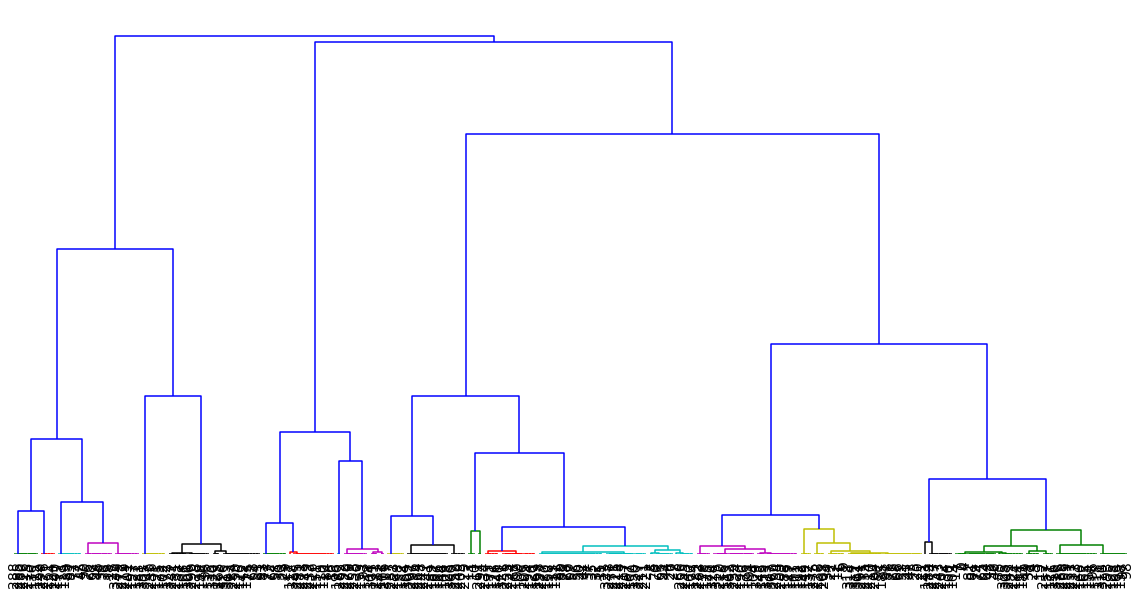

In [32]:
def do_hclustering(curves):

    f, ax = plt.subplots(1, 1, figsize=(20, 10))

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.get_yaxis().set_visible(False)


    Z = hac.linkage(curves, method='complete', metric='correlation')
    d = hac.dendrogram( Z, ax = ax, color_threshold = 0.1,  leaf_rotation=90.,  leaf_font_size=14., show_leaf_counts = True, no_labels = False)

    return Z

linkage_matrix = do_hclustering(curves)

6 332
5 332
4 332


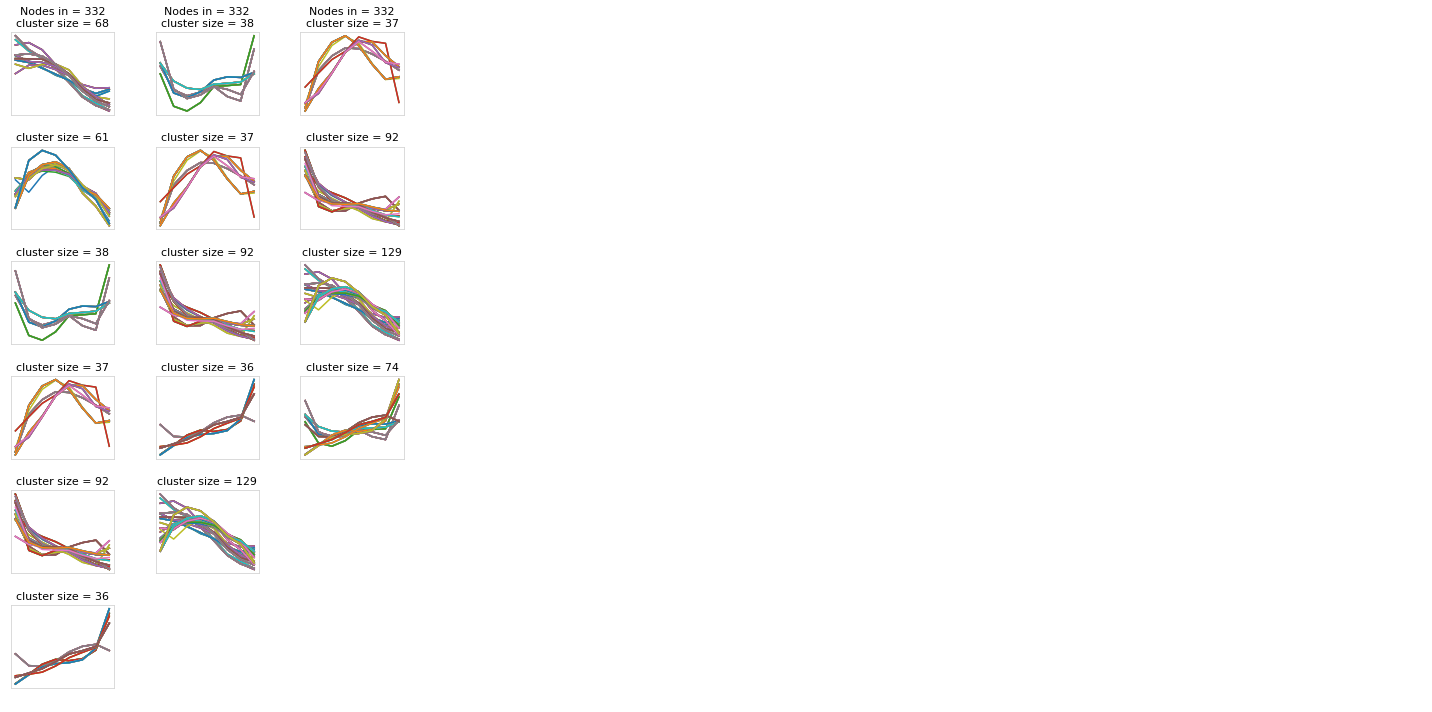

In [35]:
def plot_clusters(linkage_matrix):

    Z = linkage_matrix 
    n = len(curves)
    cluster_dict = dict()


    nnn = 10
    mmm = 6
    f, ax = plt.subplots(mmm,nnn, figsize=(20, 10))

    indind = 0

    for i in range(0, 331):

        new_cluster_id = n+i
        old_cluster_id_0 = linkage_matrix[i, 0]
        old_cluster_id_1 = linkage_matrix[i, 1]
        combined_ids = list()
        if old_cluster_id_0 in cluster_dict:
            combined_ids += cluster_dict[old_cluster_id_0]
            del cluster_dict[old_cluster_id_0]
        else:
            combined_ids += [old_cluster_id_0]
        if old_cluster_id_1 in cluster_dict:
            combined_ids += cluster_dict[old_cluster_id_1]
            del cluster_dict[old_cluster_id_1]
        else:
            combined_ids += [old_cluster_id_1]
        cluster_dict[new_cluster_id] = combined_ids

        n_c = len(cluster_dict.keys())
        n_n = len([item for sublist in cluster_dict.values() for item in sublist])

        if i > 315 and n_c > 3 and n_c < 7: 

            for jind, (clus, nodes) in enumerate(cluster_dict.items()):



                for nnodes in nodes:
                    ax[jind, indind].plot(curves[int(nnodes)])

                if jind == 0:
                    ax[jind, indind].set_title('Nodes in = ' + str(n_n) + '\ncluster size = ' + str(len(nodes)), fontsize = 11)
                else:
                    ax[jind, indind].set_title('cluster size = ' + str(len(nodes)), fontsize = 11)

                ax[jind, indind].spines['bottom'].set_color('lightgrey')
                ax[jind, indind].spines['top'].set_color('lightgrey')
                ax[jind, indind].spines['left'].set_color('lightgrey')
                ax[jind, indind].spines['right'].set_color('lightgrey')
                ax[jind, indind].get_yaxis().set_visible(False)
                ax[jind, indind].get_xaxis().set_visible(False)



            indind += 1

            print n_c, n_n


    for i in range(mmm):
        for j in range(nnn):
            if len(ax[i,j].lines) == 0:
                ax[i,j].set_axis_off()

    plt.tight_layout()
    
    
    
plot_clusters(linkage_matrix)

# WARP ALIGNMENT

In [114]:
def get_curves2(tipus):

    files = []

    for NNN in [3, 5, 6, 10]:
        folder = 'clusters_warped/' + str(NNN)
        files  += [folder + '/' + fff for fff in os.listdir(folder) if '.dat' in fff and tipus in fff]


    curves = []

    xs = set()
    ys = set()

    for fn in files:

        with open(fn) as myfile:
            x, y = myfile.read().strip().split('\n')
            xs.add(x)
            ys.add(y)

    curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]
    
    return curves


curves_ref  = get_curves2('ref')
curves_comp = get_curves2('comp_15')
len(curves_comp)

34

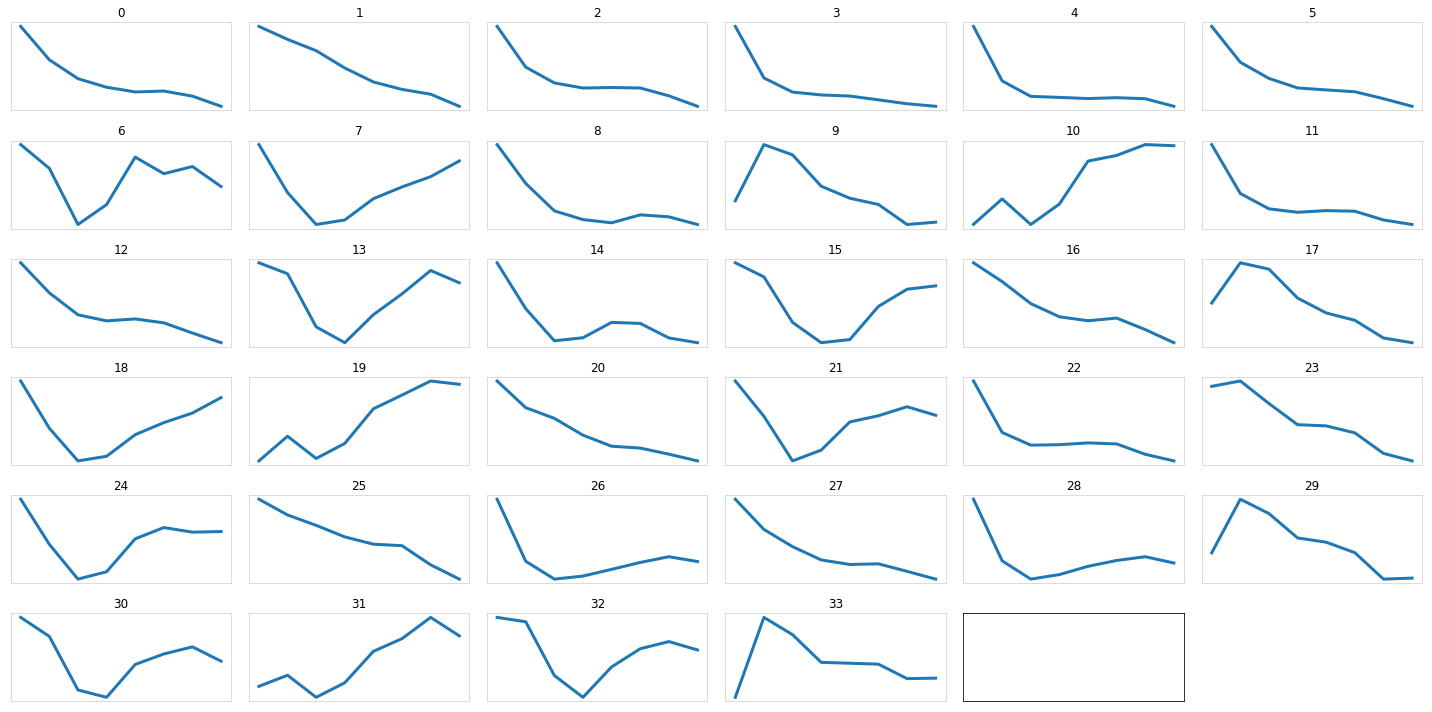

In [104]:
plot_curves(curves_comp)

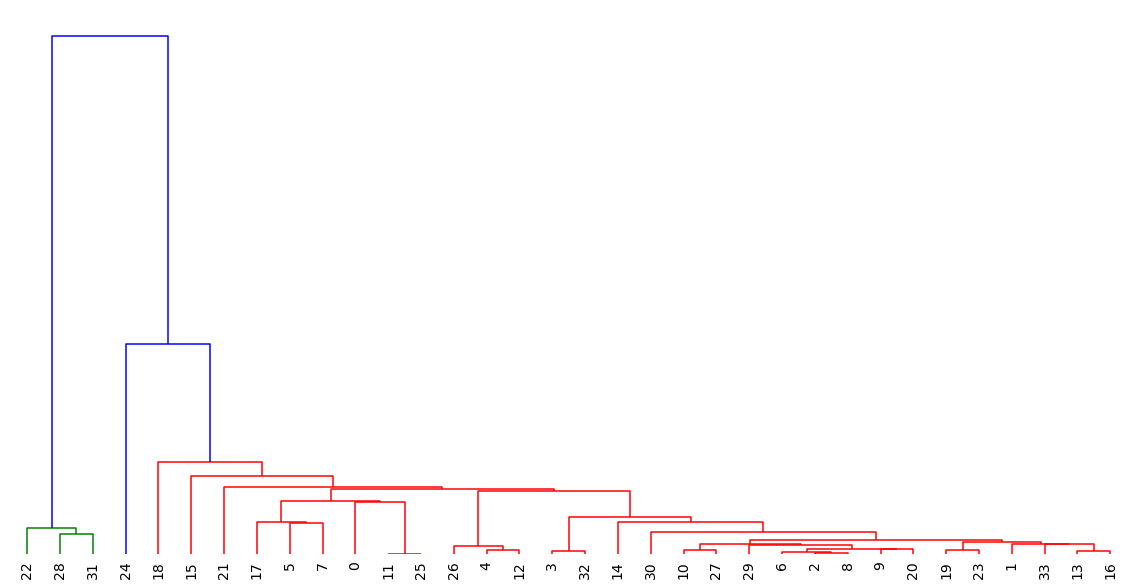

In [115]:
Z = do_hclustering(curves_comp)

6 28
6 29
5 29
5 30
4 30
3 30


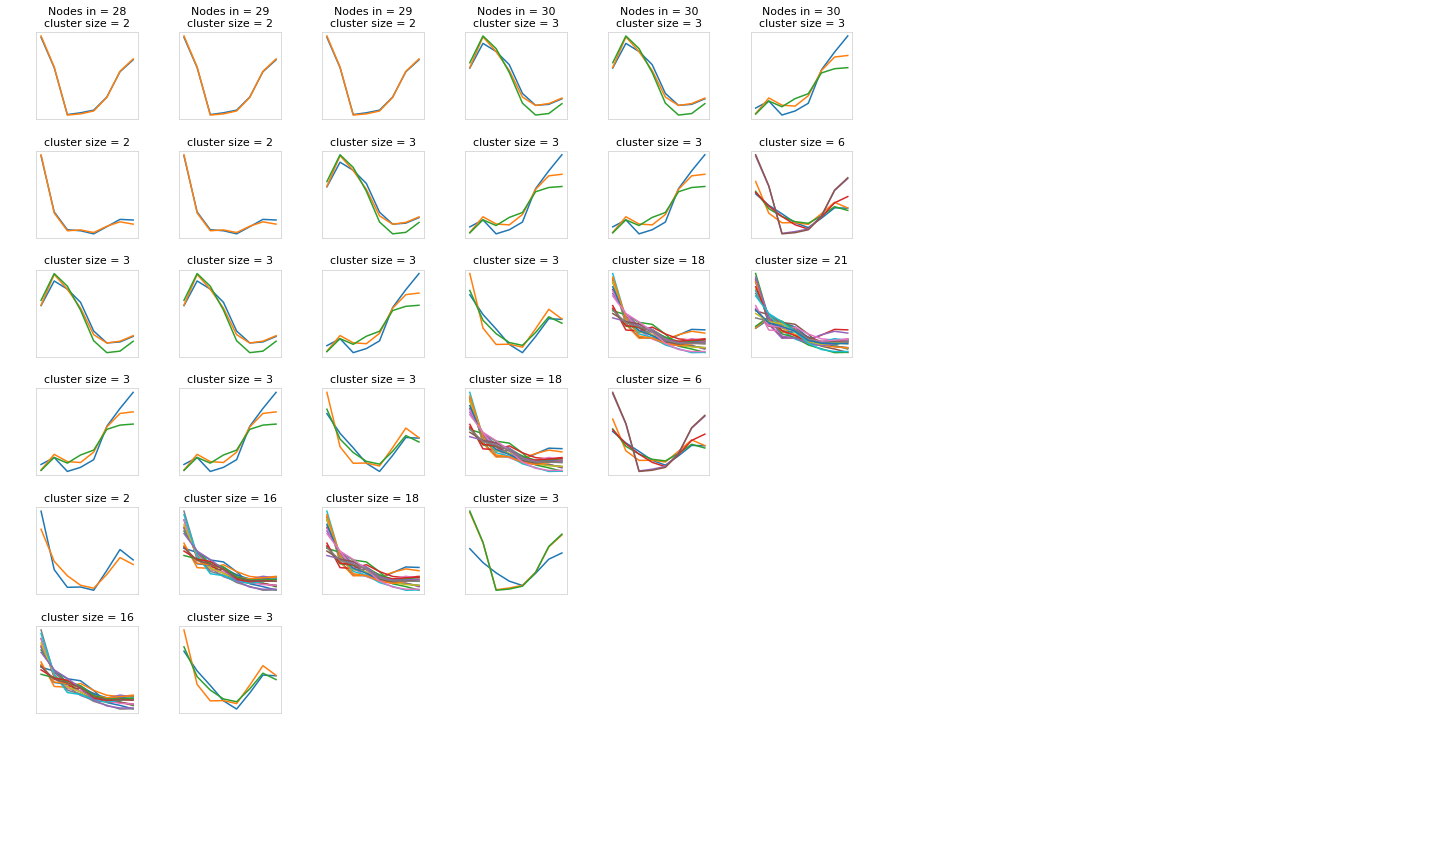

In [116]:


linkage_matrix = Z
n = len(curves_comp)
cluster_dict = dict()


nnn = 10
mmm = 7
f, ax = plt.subplots(mmm,nnn, figsize=(20, 12))

indind = 0

for i in range(0, 33):

    new_cluster_id = n+i
    old_cluster_id_0 = linkage_matrix[i, 0]
    old_cluster_id_1 = linkage_matrix[i, 1]
    combined_ids = list()
    if old_cluster_id_0 in cluster_dict:
        combined_ids += cluster_dict[old_cluster_id_0]
        del cluster_dict[old_cluster_id_0]
    else:
        combined_ids += [old_cluster_id_0]
    if old_cluster_id_1 in cluster_dict:
        combined_ids += cluster_dict[old_cluster_id_1]
        del cluster_dict[old_cluster_id_1]
    else:
        combined_ids += [old_cluster_id_1]
    cluster_dict[new_cluster_id] = combined_ids

    n_c = len(cluster_dict.keys())
    n_n = len([item for sublist in cluster_dict.values() for item in sublist])

    if i > 20 and n_c > 2: 

        for jind, (clus, nodes) in enumerate(cluster_dict.items()):



            for nnodes in nodes:
                ax[jind, indind].plot(curves_comp[int(nnodes)])

            if jind == 0:
                ax[jind, indind].set_title('Nodes in = ' + str(n_n) + '\ncluster size = ' + str(len(nodes)), fontsize = 11)
            else:
                ax[jind, indind].set_title('cluster size = ' + str(len(nodes)), fontsize = 11)

            ax[jind, indind].spines['bottom'].set_color('lightgrey')
            ax[jind, indind].spines['top'].set_color('lightgrey')
            ax[jind, indind].spines['left'].set_color('lightgrey')
            ax[jind, indind].spines['right'].set_color('lightgrey')
            ax[jind, indind].get_yaxis().set_visible(False)
            ax[jind, indind].get_xaxis().set_visible(False)



        indind += 1

        print n_c, n_n
    

for i in range(mmm):
    for j in range(nnn):
        if len(ax[i,j].lines) == 0:
            ax[i,j].set_axis_off()

plt.tight_layout()